### IMPORT DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#### Read Dataset

In [97]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/dinnalul_klasifikasi.csv')
df.head(5)

,rating,comment,label
0,5,oke mantul deh pokok terimakasih shopee moga j...,positif
1,5,puaaspertama belanja baguusmksih tahan,positif
2,5,bahan bagus warna respon cepat,positif
3,5,mantap jiwa pokok puas belanja harga murah bar...,positif
4,5,cute,positif


In [98]:
len(df)

1040

#### Cek jumlah data per-label

In [99]:
print(f"label positif = {len(df[df['label']== 'positif'])} rows")
print(f"label netral = {len(df[df['label']== 'netral'])} rows")
print(f"label negatif = {len(df[df['label']== 'negatif'])} rows")

label positif = 1008 rows
label netral = 23 rows
label negatif = 9 rows


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   1040 non-null   int64 
 1   comment  1040 non-null   object
 2   label    1040 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.5+ KB


#### Cek Dataset NaN

In [101]:
df.isnull().sum()

rating     0
comment    0
label      0
dtype: int64

In [83]:
baris_nan = df[df.isna().any(axis=1)]

print("Baris dengan nilai NaN:")
print(baris_nan)

Baris dengan nilai NaN:
Empty DataFrame
Columns: [rating, comment2, label]
Index: []


In [ ]:
df.dropna()

,rating,comment,label
0,4,bagus tpi hitam ndk ndk konfirmasinyapengemasa...,positif
1,4,barang selamatkualitas sesuai harga bahan bagus,positif
2,5,terimakasih barang alhamdulilah suka recommend,positif
3,5,bagus murah bagus nurah bagus murah bagus murah,positif
4,5,barang sesuay pesan lumayan bagus sesuay harga...,positif
...,...,...,...
578,1,kecewa bahan tipis ukur,negatif
579,2,maaf yah foto random tp jilbab warna cantik tr...,negatif
580,1,order kecewa kemas pesan baby blue dtg abu lia...,negatif
581,1,kecewa barang ga sesuai gambar gambar variant ...,negatif


### PEMBOBOTOAN TF-IDF

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv = clf.fit_transform(df['comment'].values.astype('U'))
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

### DATA TRAINING DAN DATA TEST

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, df['label'], test_size = 0.20, stratify=df['label'], random_state = 0)

### MODEL

In [ ]:
# class_weights = {'negatif': 1/53, 'netral': 1/58, 'positif': 1/472}

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, class_weight='balanced')
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

print(classification_report(y_test, y_pred))

Accuracy: 0.9711538461538461
Precision: 0.9711538461538461
Recall: 0.9711538461538461
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.00      0.00      0.00         4
     positif       0.97      1.00      0.99       202

    accuracy                           0.97       208
   macro avg       0.32      0.33      0.33       208
weighted avg       0.94      0.97      0.96       208



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Visualization Classification report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


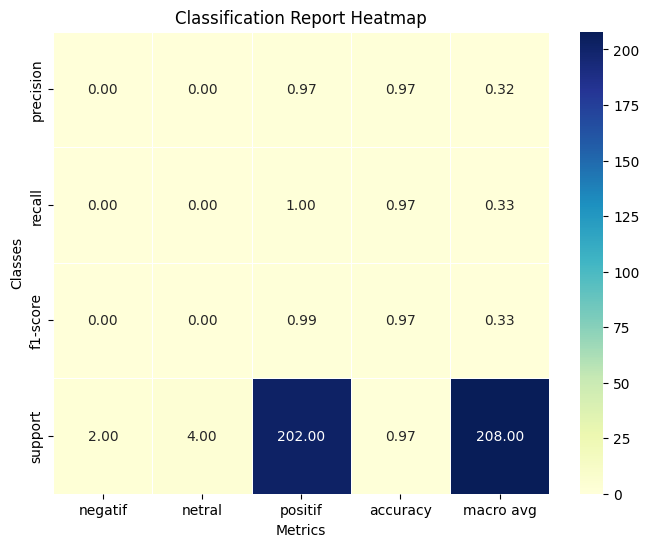

In [106]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Konversi ke DataFrame dan tampilkan
report_df = pd.DataFrame(report).transpose()
# print(report_df)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/dinnalul/CR_dinnalul.png")
plt.show()


#### Confusion Metrix

In [107]:
class_label = ["negative", 'netral',"positive"]

def cnf_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')
  plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/dinnalul/CM_dinnalul.png")

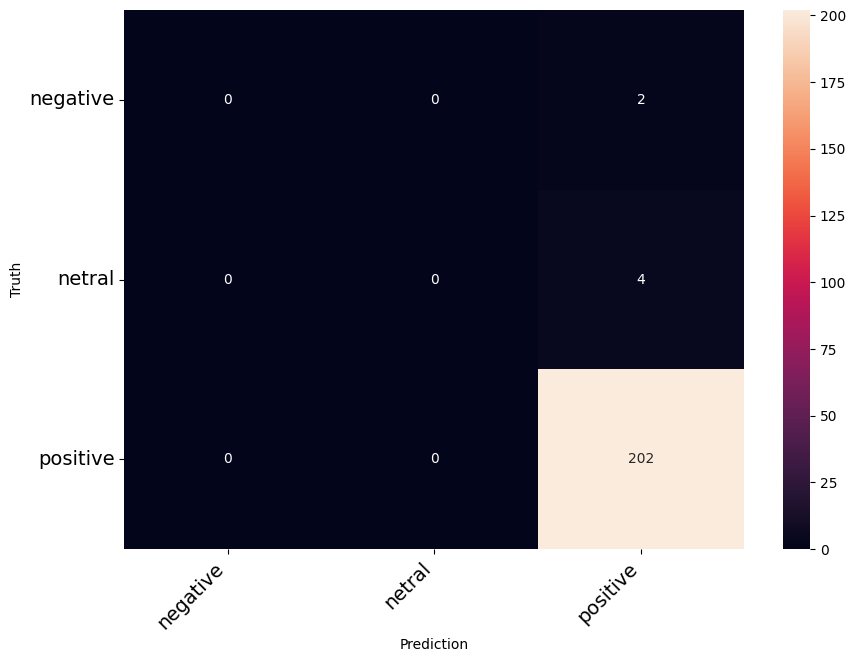

In [108]:
cm = confusion_matrix(y_test, y_pred)
cnf_matrix(cm, class_label)

#Predict Data

In [109]:
X_cv = clf.fit_transform(df['comment'].values.astype('U'))
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [110]:
pred = rfc.predict(X_tf)
pred

array(['positif', 'positif', 'positif', ..., 'negatif', 'negatif',
       'negatif'], dtype=object)

In [111]:
df['Predict'] = pred

In [112]:
df

,rating,comment,label,Predict
0,5,oke mantul deh pokok terimakasih shopee moga j...,positif,positif
1,5,puaaspertama belanja baguusmksih tahan,positif,positif
2,5,bahan bagus warna respon cepat,positif,positif
3,5,mantap jiwa pokok puas belanja harga murah bar...,positif,positif
4,5,cute,positif,positif
...,...,...,...,...
1035,1,garis cacat krudung,negatif,negatif
1036,2,beli jilbab tokoharga merk kualitas bahan beda,negatif,positif
1037,2,bahan licin sulit atur pakai ngembang tidak se...,negatif,negatif
1038,1,jilbab bagus pinggir cantik motif lace deh,negatif,negatif


In [113]:
df.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/dinnalul/hasil_klasifikasi_dinnalul.csv', index=False)

In [114]:
# Tampilkan data asli dan jumlahnya
print("\nData Asli:")
print(df['label'].value_counts())

# Prediksi label dengan menggunakan seluruh data
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(pred).value_counts())



Data Asli:
positif    1008
netral       23
negatif       9
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    1014
netral       19
negatif       7
dtype: int64


#### Accuracy Score dengan K-Fold

In [ ]:
SVM_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
print('Cross validation score(Support Vector Machine Classifier): %0.4f with a standart deviation of %0.4f'%(SVM_cv_score.mean(), SVM_cv_score.std()))

Cross validation score(Support Vector Machine Classifier): 0.7919 with a standart deviation of 0.0164
